In [1]:
import os

os.chdir("..")

import pandas as pd
import matplotlib.pyplot as plt
import MLUtils.evaluation.Clustering as ClustersUtils

from sklearn.datasets import make_blobs

dataset, classes = make_blobs(n_samples=200, n_features=4, centers=4, cluster_std=0.5, random_state=0)
df = pd.DataFrame(dataset, columns=['var1', 'var2', 'var3', 'var4'])
df.head(2)

%load_ext autoreload
%autoreload 2

# Kmeans

In [2]:
ClustersUtils.KMEANS_KWARG

{'init': 'k-means++', 'n_init': 50, 'max_iter': 1000, 'random_state': 42}

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:04<00:00,  4.60it/s]


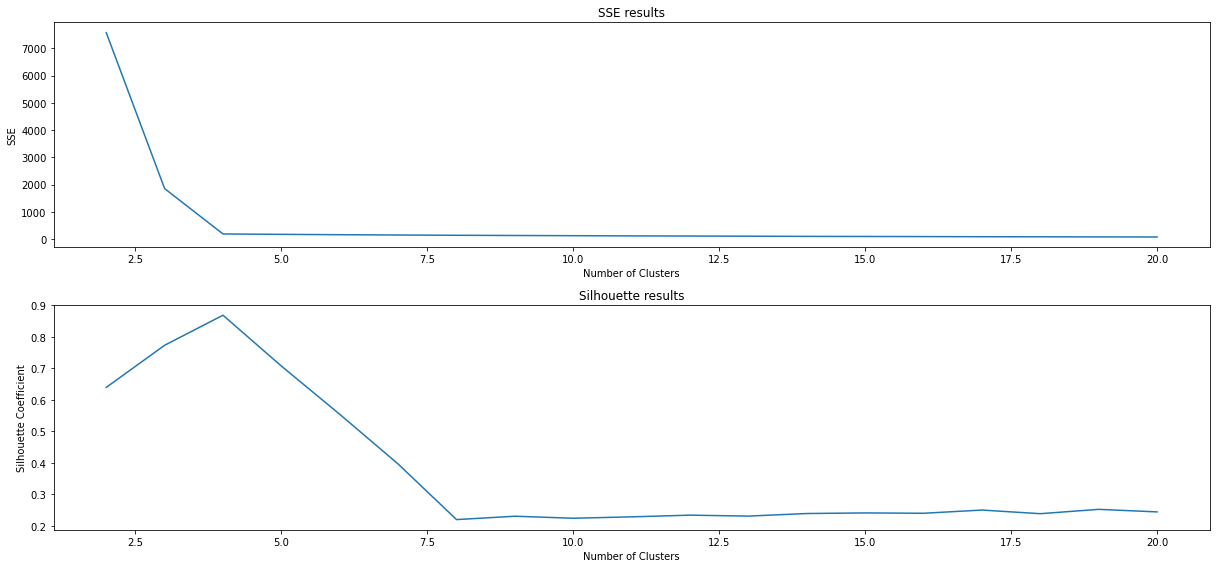

The elbow is at 4


In [3]:
clusters_dict = ClustersUtils.evaluate_kmeans(features=df, kmeans_kwargs=ClustersUtils.KMEANS_KWARG, clusters_range=range(2, 21), njobs=-1)

In [4]:
ClustersUtils.decision_tree_analysis(data=df, labels=clusters_dict[4].labels_)

,cluster 0 features,cluster 0 features scores,cluster 1 features,cluster 1 features scores,cluster 2 features,cluster 2 features scores,cluster 3 features,cluster 3 features scores
0,var1,0.666667,var3,1.0,var1,1.0,var1,1.0
1,var3,0.333333,var1,0.0,var2,0.0,var2,0.0
2,var2,0.0,var2,0.0,var3,0.0,var3,0.0
3,var4,0.0,var4,0.0,var4,0.0,var4,0.0


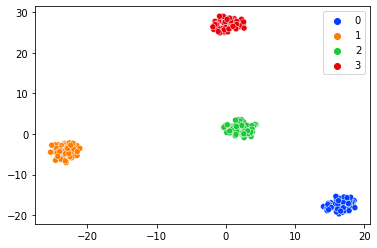

In [5]:
ClustersUtils.plot_cluster_2d(df, clusters_dict[4].labels_, n_clusters=4)

# GMM

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 16.41it/s]


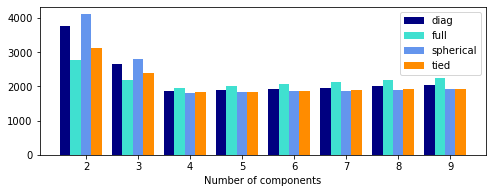

Minimum bic score is for (4, 'spherical')


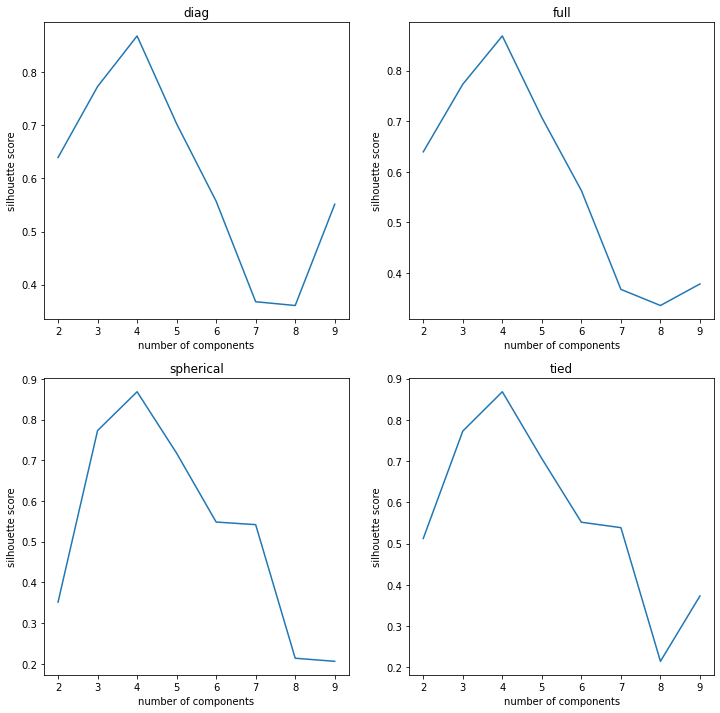

In [6]:
gmms_dict = ClustersUtils.evaluate_gmm(features=df, gmm_kwargs={}, components_range=range(2,10), njobs=1)

In [7]:
ClustersUtils.decision_tree_analysis(data=df, labels=gmms_dict[(4, 'spherical')][1])

,cluster 0 features,cluster 0 features scores,cluster 1 features,cluster 1 features scores,cluster 2 features,cluster 2 features scores,cluster 3 features,cluster 3 features scores
0,var2,1.0,var3,1.0,var1,1.0,var4,1.0
1,var1,0.0,var1,0.0,var2,0.0,var1,0.0
2,var3,0.0,var2,0.0,var3,0.0,var2,0.0
3,var4,0.0,var4,0.0,var4,0.0,var3,0.0


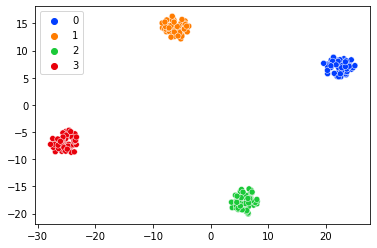

In [8]:
f, ax = plt.subplots()
ClustersUtils.plot_cluster_2d(df, gmms_dict[(4, 'spherical')][1], n_clusters=4, ax=ax)